# SSD Inference Tutorial

This a quick start for YOLK that shows how to use a trained Single-Shot MultiBox Detector(SSD) for inference on the Pascal VOC datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.optimizers import SGD

import yolk

Using TensorFlow backend.
/Users/hngskj/.virtualenvs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hngskj/.virtualenvs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hngskj/.virtualenvs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hngskj/.virtualenvs/dl/lib/p

## Load a trained SSD
`load_inference_model()` builds the model and load trained weights into it. <br>
Get SSD loss with `get_losses()` and compile the model.

------

You can find a trained model weights link below.<br>
https://github.com/pierluigiferrari/ssd_keras/<br>
Or you can download weights directly here.<br>
https://drive.google.com/file/d/1fyDDUcIOSjeiP08vl1WCndcFdtboFXua/view

In [2]:
model_path = 'VGG_VOC0712Plus_SSD_300x300_ft_iter_160000.h5'
model = yolk.detector.load_inference_model(model_path)

loss = yolk.detector.get_losses()
sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

model.compile(optimizer=sgd, loss=loss)


tracking <tf.Variable 'conv4_3_norm/conv4_3_norm_gamma:0' shape=(512,) dtype=float32> gamma
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.cast` instead.


## Load images

In [3]:
image_path = 'examples/yolk.jpg'
image = yolk.detector.preprocessing_image(image_path)

## Make predictions
You can also set a confidence threshold for your result.

In [4]:
y_pred = model.predict(image)

confidence_threshold = 0.5
y_pred_thresh = [y_pred[k][y_pred[k,:,1] > confidence_threshold] for k in range(y_pred.shape[0])]
np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_thresh[0])


Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[ 15.     0.9  140.09 158.4  170.87 293.25]
 [ 15.     0.9  204.24 148.23 236.9  291.54]
 [ 15.     0.89 121.46 155.45 151.04 296.76]
 [ 15.     0.87  64.07 154.66 102.36 303.71]
 [ 16.     0.85 225.44 151.63 285.09 210.28]
 [ 15.     0.83 181.8  153.28 210.82 294.92]
 [ 15.     0.81 164.55 159.46 198.82 295.96]
 [ 15.     0.79  99.69 152.57 133.37 299.31]
 [ 15.     0.55  39.12 128.39  77.03 298.81]
 [  9.     0.52 253.35 190.33 301.64 286.45]]


## Visualize the predictions

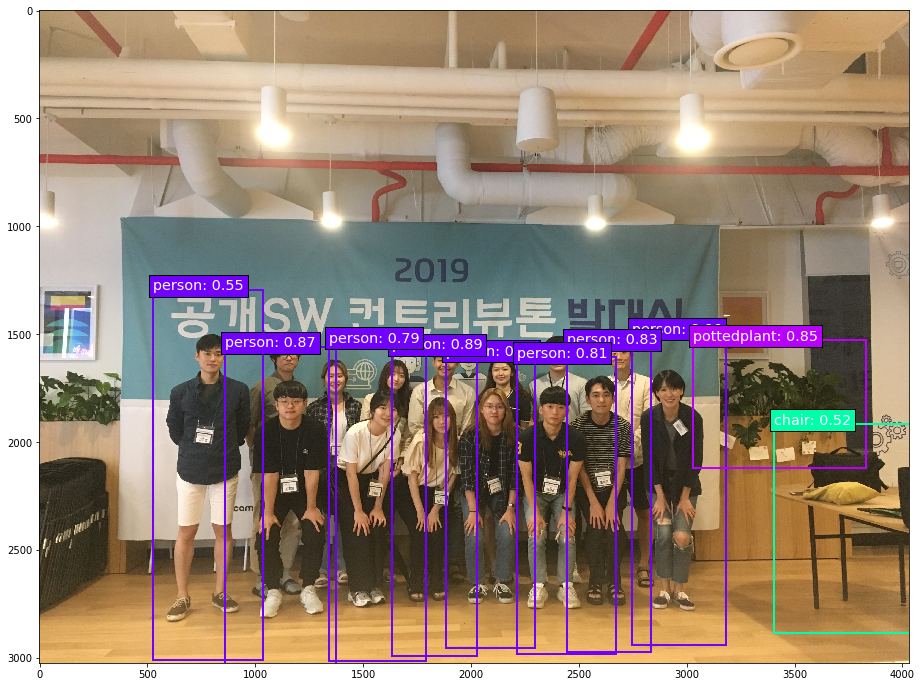

In [5]:
yolk.detector.show_result(image_path, y_pred_thresh)